# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [1]:
import pandas as pd


df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [6]:
df_valueCounts = df["age"].value_counts()
df_valueCounts

16.0      1823
17.0      1811
18.0      1661
15.0      1582
20.0      1543
          ... 
116.0        1
295.0        1
2425.0       1
92.0         1
830.0        1
Name: age, Length: 128, dtype: int64

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [5]:
df[(df.age >= 14) & (df["age"] <= 50)]["age"].mean()

22.704171601526518

2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [13]:
df_valueCounts[16] / sum([df_valueCounts[x] for x in range(16, 27)])

0.1259412780656304

3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [14]:
df_valueCounts[28] + df_valueCounts[30]

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [15]:
df[(df.age >= 18) & (df["age"] <= 30)]["age"].describe()

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

5. Сколько в датасете положительных / отрицательных примеров?

In [17]:
df["label"].value_counts()

0    32021
1    32018
Name: label, dtype: int64

### Часть 2: Предобработка (3 балла)

1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [2]:
import razdel

In [23]:
df['sent_count'] = [len(list(razdel.sentenize(row['text']))) for index, row in df.iterrows()]

In [25]:
df.head()

,text,label,age,sent_count
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18


2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [3]:
import nltk
#nltk.download("stopwords")

from nltk.corpus import stopwords

In [42]:
def textTokenizer(text, russian_stopwords=russian_stopwords):
    tokens = list(razdel.tokenize(text))
    return [_.text.lower() for _ in tokens if _.text.lower() not in russian_stopwords and len(_.text) > 1 and _.text != '...']

In [25]:
russian_stopwords = stopwords.words("russian")

In [19]:
list(razdel.tokenize("Здравтсвуйте! Я пишу вам вот по какому поводу: ваш сраный токенайзер не работает"))

[Substring(0, 12, 'Здравтсвуйте'),
 Substring(12, 13, '!'),
 Substring(14, 15, 'Я'),
 Substring(16, 20, 'пишу'),
 Substring(21, 24, 'вам'),
 Substring(25, 28, 'вот'),
 Substring(29, 31, 'по'),
 Substring(32, 38, 'какому'),
 Substring(39, 45, 'поводу'),
 Substring(45, 46, ':'),
 Substring(47, 50, 'ваш'),
 Substring(51, 57, 'сраный'),
 Substring(58, 68, 'токенайзер'),
 Substring(69, 71, 'не'),
 Substring(72, 80, 'работает')]

In [35]:
textTokenizer("Здравствуйте! Я пишу вам вот по какому поводу: ваш сраный токенайзер не работает")

['пишу', 'какому', 'поводу', 'ваш', 'сраный', 'токенайзер', 'работает']

In [16]:
'я' in russian_stopwords

True

3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [5]:
import logging
logging.basicConfig(level=logging.INFO)

In [41]:
N = df.shape[0]
token_count = []

for index, row in df.iterrows():
    token_count.append(len(textTokenizer(row['text'])))
    if index % 500 == 0:
        logging.info('%d out of %d done' % (index, N))

df['token_count'] = token_count

INFO:root:0 out of 64039 done
INFO:root:500 out of 64039 done
INFO:root:1000 out of 64039 done
INFO:root:1500 out of 64039 done
INFO:root:2000 out of 64039 done
INFO:root:2500 out of 64039 done
INFO:root:3000 out of 64039 done
INFO:root:3500 out of 64039 done
INFO:root:4000 out of 64039 done
INFO:root:4500 out of 64039 done
INFO:root:5000 out of 64039 done
INFO:root:5500 out of 64039 done
INFO:root:6000 out of 64039 done
INFO:root:6500 out of 64039 done
INFO:root:7000 out of 64039 done
INFO:root:7500 out of 64039 done
INFO:root:8000 out of 64039 done
INFO:root:8500 out of 64039 done
INFO:root:9000 out of 64039 done
INFO:root:9500 out of 64039 done
INFO:root:10000 out of 64039 done
INFO:root:10500 out of 64039 done
INFO:root:11000 out of 64039 done
INFO:root:11500 out of 64039 done
INFO:root:12000 out of 64039 done
INFO:root:12500 out of 64039 done
INFO:root:13000 out of 64039 done
INFO:root:13500 out of 64039 done
INFO:root:14000 out of 64039 done
INFO:root:14500 out of 64039 done
INFO

In [42]:
tokenMean = df['token_count'].mean()
tokenMean0 = df[df.label == 0]['token_count'].mean()
tokenMean1 = df[df.label == 1]['token_count'].mean()

print('label_mean:\t%d\nlabel_0:\t%d\nlabel_1:\t%d' % (tokenMean, tokenMean0, tokenMean1))

label_mean:	110
label_0:	145
label_1:	75


4. Напишите функцию, которая переводит текст в последовательность лемм.

In [43]:
from tqdm.auto import tqdm
tqdm.pandas()

C:\users\admin\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [6]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

INFO:pymorphy2.opencorpora_dict.wrapper:Loading dictionaries from C:\users\admin\anaconda3\lib\site-packages\pymorphy2_dicts\data
INFO:pymorphy2.opencorpora_dict.wrapper:format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [45]:
def textLemmatizer(text, isText=False, morph=morph):
    tokens = textTokenizer(text)
    lemmas = [morph.parse(word)[0].normal_form for word in tokens]
    if isText:
        return ' '.join(lemmas)
    else:
        return lemmas

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [53]:
def textPOStagger(text, isText=False, morph=morph):
    tokens = textTokenizer(text)
    tags = [morph.parse(word)[0].tag.POS for word in tokens]
    if isText:
        return ' '.join(tags)
    else:
        return tags

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

Слова приветствий: _здравствуйте, привет_. Как будет видно ниже, из 400 первых комментариев почти каждый четвертый содержит эти слова.

In [8]:
import re

with open('depression_data.tsv', 'r', encoding='utf-8') as f:
    sampletext = '\n'.join(f.read().split('\n')[:400])
    print('здравствуй(те): ' + str(len(re.findall('[Зз]дравствуй', sampletext))))
    print('привет: ' + str(len(re.findall('[Пп]ривет[^а-яА-Я]', sampletext))))

здравствуй(те): 81
привет: 17


Происходит это потому, что люди в отзывах по какой-то причине считают необходимым здороваться с будущим читателем.

In [32]:
russian_stopwords.append("привет")
russian_stopwords.append("здравствуй")
russian_stopwords.append("здравствуйте")

Также, задание 6 части 4 показало, что надо убирать часто встречающиеся элементы названий сайтов: домены, протоколы и т.д.

In [38]:
russian_stopwords.append('vk')
russian_stopwords.append('http')
russian_stopwords.append('https')
russian_stopwords.append('ru')
russian_stopwords.append('com')
russian_stopwords.append('org')

### Часть 3: Визуализация (1 балл)

In [54]:
import matplotlib.pyplot as plt

1. Визуализируйте распределение количество предложений / текст.

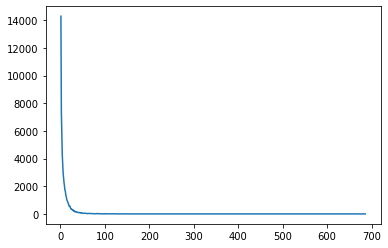

In [80]:
toPlot1 = df["sent_count"].value_counts().sort_index()
toPlot1.plot(kind='line')

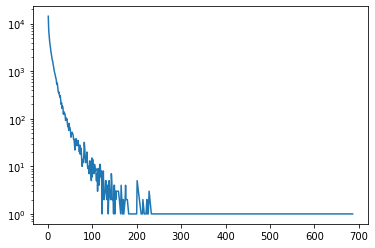

In [81]:
toPlot1.plot(kind='line', logy=True)

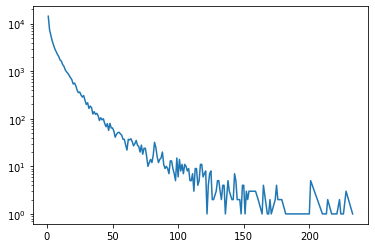

In [85]:
toPlot1.filter(items = [i for i in range(0, 250)]).plot(kind='line', logy=True)

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

In [105]:
toPlot2 = df.groupby(['label'])['sent_count'].value_counts()

pivot_count = df.pivot_table(values="text", index="sent_count", columns="label", aggfunc=pd.Series.nunique)
pivot_count

label,0,1
sent_count,,
1,4733.0,9564.0
2,3407.0,3983.0
3,2889.0,2761.0
4,2413.0,1904.0
5,2209.0,1379.0
...,...,...
258,1.0,NaN
319,NaN,1.0
416,1.0,NaN


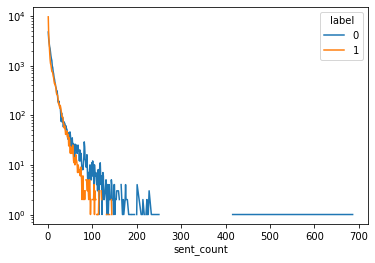

In [109]:
pivot_count.plot(kind='line', logy=True)

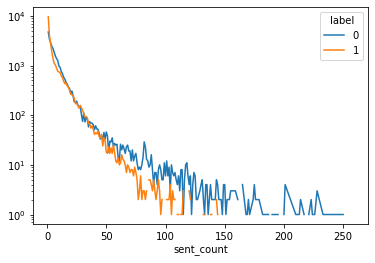

In [115]:
pivot_count[pivot_count.index <= 258].plot(kind='line', logy=True)

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

In [120]:
data = df[(df.age < 33) & (df.age >= 16)]
data['age'].corr(data['sent_count'])

0.03983124811646045

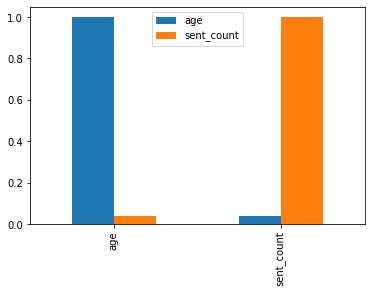

In [123]:
dc = data[['age', 'sent_count']].corr()
dc.plot(kind='bar')

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


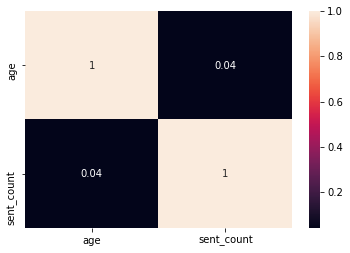

In [124]:
import seaborn as sn
sn.heatmap(dc, annot=True)
plt.show()

### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [58]:
def char_ngrams(text, n=3):
    return [text[i:i+n] for i in range(0, len(text)-n+1)]

In [63]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=4)[-10:]

[' гря',
 'гряз',
 'рязн',
 'язну',
 'зную',
 'ную ',
 'ую р',
 'ю ра',
 ' рам',
 'раму']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [64]:
def word_ngrams(text, n=3):
    tokens = textTokenizer(text)
    return char_ngrams(tokens, n)

In [65]:
# пример работы функции

word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [66]:
word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [67]:
def lemma_ngrams(text, n=3):
    lemmas = textLemmatizer(text)
    return char_ngrams(lemmas, n)

In [70]:
# пример работы функции

lemma_ngrams(text, n=3)

[['устать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рам']]

In [71]:
lemma_ngrams(text, n=4)

[['устать', 'мама', 'мыло', 'грязный'], ['мама', 'мыло', 'грязный', 'рам']]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [72]:
def pos_ngrams(text, n=3):
    tags = textPOStagger(text)
    return char_ngrams(tags, n)

In [73]:
# пример работы функции

pos_ngrams(text, n=3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [74]:
pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [75]:
def build_pos_dict(corpus):
    counterDict = {}
    for text in corpus:
        tags = textPOStagger(text)
        for t in tags:
            if t not in counterDict:
                counterDict[t] = 1
            else:
                counterDict[t] += 1
    return counterDict

In [76]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'NOUN': 7, 'PRTF': 1, 'ADJF': 2, 'VERB': 1}

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [10]:
subset = pd.concat([df[df["label"] == 0].sample(250), df[df["label"] == 1].sample(250)])

label0dict = dict()
label1dict = dict()

In [46]:
commonDict = {
    0: label0dict,
    1: label1dict
}

for _, row in subset.iterrows():
    lemmas = textLemmatizer(row.text)
    for word in lemmas:
        if word in commonDict[row.label]:
            commonDict[row.label][word] += 1
        else:
            commonDict[row.label][word] = 1

In [47]:
for label in commonDict:
    print(label)
    print({k: v for k, v in sorted(commonDict[label].items(), key=lambda item: item[1], reverse=True)[:15]})

0
{'год': 1851, 'который': 919, 'это': 743, 'свой': 702, 'наш': 674, 'https': 655, 'апрель': 652, 'forms': 640, 'один': 627, 'проект': 621, 'день': 600, 'gle': 585, 'также': 571, 'область': 537, 'россия': 520}
1
{'это': 984, 'год': 764, 'жить': 728, 'мочь': 723, 'жизнь': 720, 'хотеть': 636, 'весь': 607, 'очень': 568, 'мой': 549, 'просто': 500, 'человек': 496, 'знать': 452, 'который': 428, 'свой': 400, '..': 396}


Пересекаются: "это", "год", "который"
Для группы 1 часты ожидаемые "жить", "жизнь", "хотеть", "мочь"

(еще УДИВИТЕЛЬНО, но "Россия" встречается очень часто в позитивных отзывах)

7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

In [ ]:
# your answer text here